#Preparing Data

Loading train and test data.

In [ ]:
! wget -O task2_ru_training.tsv https://www.dropbox.com/s/2nvhmusyozfrrn9/train.tsv?dl=0
! wget -O task2_ru_test.tsv https://www.dropbox.com/s/77s33v3q3q1i5mr/test.tsv?dl=0

--2025-04-02 20:24:49--  https://www.dropbox.com/s/2nvhmusyozfrrn9/train.tsv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/wwfpnhjsr6iav25qzc503/train.tsv?rlkey=oivvlhhxwi8wkyvbdumzyncki&dl=0 [following]
--2025-04-02 20:24:49--  https://www.dropbox.com/scl/fi/wwfpnhjsr6iav25qzc503/train.tsv?rlkey=oivvlhhxwi8wkyvbdumzyncki&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc59a18cc397ba8e3cfd22ec08ef.dl.dropboxusercontent.com/cd/0/inline/CnFyLA5rEgXt0iKOlriwedAf7SaTKtQ-G6nzAnutnNaEErjHgcsU0NsValWaQRjA2Y-LytIsT-vVu5Lnuo4c1yeEOzjWWeYGRDaKOgbwww1XLIXpy4zcPpEXOYNhdS-t5Sc/file# [following]
--2025-04-02 20:24:50--  https://uc59a18cc397ba8e3cfd22ec08ef.dl.dropboxusercontent.com/cd/0/inline/CnFyLA5rEgXt0

### Splitting train and dev sets into train, dev, and test

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
train_path = r"task2_ru_training.tsv"
test_path = r"task2_ru_test.tsv"
res_dataset_dir = r"corpus_normalized/"
if not os.path.exists(res_dataset_dir):
    os.makedirs(res_dataset_dir)

In [ ]:
train_df = pd.read_csv(train_path, sep=",", encoding="utf-8")
test_df = pd.read_csv(test_path, sep=",", encoding="utf-8")
train_df, dev_df, _, _ = \
    train_test_split(train_df, train_df, test_size=0.15, random_state=42)

train_positive_class_df = train_df[train_df['class'] == 1]
train_negative_class_df = train_df[train_df['class'] == 0]
num_positive_examples = train_positive_class_df.shape[0]
# For training set, we take the same amount of positive and negative examples
train_negative_class_df = train_negative_class_df.sample(num_positive_examples, )
# Concatenating positive and negative examples and shuffling the training set
class_normalized_train_df = pd.concat([train_positive_class_df, train_negative_class_df]).sample(frac=1)


out_train_path = os.path.join(res_dataset_dir, "train.tsv")
out_test_path = os.path.join(res_dataset_dir, "test.tsv")
out_dev_path = os.path.join(res_dataset_dir, "dev.tsv")

# class_normalized_train_df.to_csv(out_train_path, sep="\t", encoding="utf-8", index=False, )
train_df.to_csv(out_train_path, sep="\t", encoding="utf-8", index=False,)
test_df.to_csv(out_test_path, sep="\t", encoding="utf-8", index=False)
dev_df.to_csv(out_dev_path, sep="\t", encoding="utf-8", index=False, )

print(train_df.shape)
print(dev_df.shape)

(8087, 3)
(1428, 3)


### Preprocessing

Preprocessing is adopted from:

https://github.com/akutuzov/webvectors/blob/master/preprocessing/modular_processing/unify.py

We unify letters to decrease the size of dictionary. We also unify and remove all punctuation.

In [ ]:
import re
def list_replace(search, replacement, text):
    """
    Replaces all symbols of text which are present
    in the search string with the replacement string.
    """
    search = [el for el in search if el in text]
    for c in search:
        text = text.replace(c, replacement)
    return text

def clean_text(text):

    text = list_replace \
        ('\u00AB\u00BB\u2039\u203A\u201E\u201A\u201C\u201F\u2018\u201B\u201D\u2019', '\u0022', text)

    text = list_replace \
        ('\u2012\u2013\u2014\u2015\u203E\u0305\u00AF', '\u2003\u002D\u002D\u2003', text)

    text = list_replace('\u2010\u2011', '\u002D', text)

    text = list_replace \
            (
            '\u2000\u2001\u2002\u2004\u2005\u2006\u2007\u2008\u2009\u200A\u200B\u202F\u205F\u2060\u3000',
            '\u2002', text)

    text = re.sub('\u2003\u2003', '\u2003', text)
    text = re.sub('\t\t', '\t', text)

    text = list_replace \
            (
            '\u02CC\u0307\u0323\u2022\u2023\u2043\u204C\u204D\u2219\u25E6\u00B7\u00D7\u22C5\u2219\u2062',
            '.', text)

    text = list_replace('\u2217', '\u002A', text)

    text = list_replace('…', '...', text)

    text = list_replace('\u00C4', 'A', text)
    text = list_replace('\u00E4', 'a', text)
    text = list_replace('\u00CB', 'E', text)
    text = list_replace('\u00EB', 'e', text)
    text = list_replace('\u1E26', 'H', text)
    text = list_replace('\u1E27', 'h', text)
    text = list_replace('\u00CF', 'I', text)
    text = list_replace('\u00EF', 'i', text)
    text = list_replace('\u00D6', 'O', text)
    text = list_replace('\u00F6', 'o', text)
    text = list_replace('\u00DC', 'U', text)
    text = list_replace('\u00FC', 'u', text)
    text = list_replace('\u0178', 'Y', text)
    text = list_replace('\u00FF', 'y', text)
    text = list_replace('\u00DF', 's', text)
    text = list_replace('\u1E9E', 'S', text)
    # Removing punctuation
    text = list_replace(',.[]{}()=+-−*&^%$#@!~;:§/\|\?"\n', ' ', text)
    # Replacing all numbers with masks
    text = list_replace('0123456789', 'x', text)

    currencies = list \
            (
            '\u20BD\u0024\u00A3\u20A4\u20AC\u20AA\u2133\u20BE\u00A2\u058F\u0BF9\u20BC\u20A1\u20A0\u20B4\u20A7\u20B0\u20BF\u20A3\u060B\u0E3F\u20A9\u20B4\u20B2\u0192\u20AB\u00A5\u20AD\u20A1\u20BA\u20A6\u20B1\uFDFC\u17DB\u20B9\u20A8\u20B5\u09F3\u20B8\u20AE\u0192'
        )

    alphabet = list \
            (
            '\t\r абвгдеёзжийклмнопрстуфхцчшщьыъэюяАБВГДЕЁЗЖИЙКЛМНОПРСТУФХЦЧШЩЬЫЪЭЮЯabcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ ')

    allowed = set(currencies + alphabet)

    cleaned_text = [sym for sym in text if sym in allowed]
    cleaned_text = ''.join(cleaned_text)

    return cleaned_text.lower()

In [ ]:
train_path = r"corpus_normalized/train.tsv"
dev_path = r"corpus_normalized/dev.tsv"
test_path = r"corpus_normalized/test.tsv"

# Loading data
train_df = pd.read_csv(train_path, sep='\t', encoding="utf-8",)
dev_df = pd.read_csv(dev_path, sep='\t', encoding="utf-8",)
test_df = pd.read_csv(test_path, sep='\t', encoding="utf-8",)

# Extracting tweet texts
train_tweet_texts = train_df.tweet.values
test_tweet_texts = test_df.tweet.values
dev_tweet_texts = dev_df.tweet.values

# Preprocessing training tweets
cleaned_train_texts = []
for tweet_text in train_tweet_texts:
    cleaned_text = clean_text(tweet_text).lower()
    split_cleaned_text = cleaned_text.split()
    cleaned_train_texts.append(" ".join(split_cleaned_text))

# Preprocessing test tweets
cleaned_test_texts = []
for tweet_text in test_tweet_texts:
    cleaned_text = clean_text(tweet_text)
    cleaned_test_texts.append(" ".join(cleaned_text.split()))

# Preprocessing validation tweets
cleaned_dev_texts = []
for tweet_text in dev_tweet_texts:
    cleaned_text = clean_text(tweet_text)
    cleaned_dev_texts.append(" ".join(cleaned_text.split()))

train_df["clean_text"] = cleaned_train_texts
dev_df["clean_text"] = cleaned_dev_texts
test_df["clean_text"] = cleaned_test_texts

In [ ]:
from collections import Counter

Counter(train_df['class'])

Counter({0: 7368, 1: 719})

### Модель

In [ ]:
#!pip install transformers

In [ ]:
import torch.nn as nn
from transformers import AutoTokenizer, AutoModel, get_linear_schedule_with_warmup
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW

In [ ]:
PRE_TRAINED_MODEL_NAME = 'ai-forever/ruBert-base' #'Shakhovak/ruBertBase_attr'
BATCH_SIZE = 32
EPOCHS = 6
LEARNING_RATE=2e-5
NUM_WARMUP_STEPS=0

In [ ]:
n_classes = 2

In [ ]:
class TwitterClassifier(nn.Module):
  def __init__(self, n_classes):
    super(TwitterClassifier, self).__init__()
    self.bert = AutoModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

    self.drop = nn.Dropout(p=0.7)

    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

  def forward(self, input_ids, attention_mask):
    outputs = self.bert(input_ids=input_ids,
                         attention_mask=attention_mask)
    # last_hidden_state_cls = outputs[0][:, 0, :]
    last_hidden_state_cls = outputs['pooler_output']
    output = self.drop(last_hidden_state_cls)
    return self.out(output)

In [ ]:
class TwitterClassifier(nn.Module):
    def __init__(self, n_classes):
        super(TwitterClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
        self.drop1 = nn.Dropout(p=0.3)
        self.bn1 = nn.BatchNorm1d(self.bert.config.hidden_size)
        self.linear = nn.Linear(self.bert.config.hidden_size, n_classes) #nn.Linear(self.bert.config.hidden_size, self.bert.config.hidden_size//2)
        #self.activation = nn.GELU() #nn.LeakyReLU()
        #self.drop2 = nn.Dropout(p=0.4)
        #self.bn2 = nn.BatchNorm1d(self.bert.config.hidden_size//2)
        #self.out = nn.Linear(self.bert.config.hidden_size//2, n_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)

        last_hidden_state_cls = outputs['pooler_output']
        x = self.drop1(last_hidden_state_cls)
        x = self.bn1(x)

        x = self.linear(x)
        #x = self.activation(x)
        #x = self.drop2(x)
        #x = self.bn2(x)

        return x #self.out(x)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
train_tokenized = [tokenizer.encode(x, add_special_tokens=True) for x in cleaned_train_texts]
dev_tokenized = [tokenizer.encode(x, add_special_tokens=True) for x in cleaned_dev_texts]
test_tokenized = [tokenizer.encode(x, add_special_tokens=True) for x in cleaned_test_texts]

In [ ]:
# находим самое длинное предложение
train_max_len = 0
for i in train_tokenized:
    if len(i) > train_max_len:
        train_max_len = len(i)

dev_max_len = 0
for i in dev_tokenized:
    if len(i) > dev_max_len:
        dev_max_len = len(i)

test_max_len = 0
for i in test_tokenized:
    if len(i) > test_max_len:
        test_max_len = len(i)

print(train_max_len)
print(dev_max_len)
print(test_max_len)


126
77
102


In [ ]:
class BalancedTwitterDataset(Dataset):
    def __init__(self, df, tokenizer, max_len):
        self.texts = df['clean_text'].values
        self.targets = torch.tensor(df['label'].values, dtype=torch.long)
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': self.targets[idx]
        }

In [ ]:
class TwitterDataset(Dataset):
  def __init__(self, ids, tweets, targets, tokenizer, max_len):
    self.ids = ids
    self.tweets = tweets
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.tweets)

  def __getitem__(self, item):
    tweet = str(self.tweets[item])
    target = self.targets[item]
    id = self.ids[item]
    encoding = self.tokenizer.encode_plus(
      tweet,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      padding='max_length',
      return_attention_mask=True,
      return_tensors='pt',
      truncation=True,
    )
    return {
      'id': id,
      'tweet_text': tweet,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [ ]:
def create_data_loader(df, tokenizer, batch_size, max_len):
  if "label" in df:
    labels = df.label.to_numpy()
  else:
    labels = [0] * len(df)
  ds = TwitterDataset(
    ids = df.id,
    tweets=df.clean_text,
    targets=labels,
    tokenizer=tokenizer,
    max_len=max_len
  )
  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=2,
  )

In [ ]:
def create_data_loader_balanced(df, tokenizer, batch_size, max_len):
    dataset = BalancedTwitterDataset(
        df=df,
        tokenizer=tokenizer,
        max_len=max_len
    )

    return DataLoader(
        dataset,
        batch_size=batch_size,
        num_workers=2,
        shuffle=True if 'label' in df.columns else False
    )

In [ ]:
print(test_df.columns)
train_df = train_df.rename(columns={'class': 'label'})
dev_df = dev_df.rename(columns={'class': 'label'})
print(train_df.shape)
print(dev_df.shape)
print(test_df.shape)

Index(['id', 'tweet', 'clean_text'], dtype='object')
(8087, 4)
(1428, 4)
(1504, 3)


In [ ]:
from sklearn.utils import resample

# Разделяем данные на положительные и отрицательные классы
train_positive = train_df[train_df['label'] == 1]
train_negative = train_df[train_df['label'] == 0]

# Балансируем классы (up-sampling меньшего класса)
if len(train_positive) > len(train_negative):
    train_negative = resample(train_negative,
                             replace=True,  # Разрешаем повторение samples
                             n_samples=len(train_positive),  # До количества majority class
                             random_state=42)
else:
    train_positive = resample(train_positive,
                             replace=True,
                             n_samples=len(train_negative),
                             random_state=42)

# Объединяем и перемешиваем
balanced_train_df = pd.concat([train_positive, train_negative]).sample(frac=1, random_state=42)

# Проверяем баланс
print(balanced_train_df['label'].value_counts())

label
1    7368
0    7368
Name: count, dtype: int64


In [ ]:
from sklearn.utils import resample

# Разделяем данные на положительные и отрицательные классы
train_positive = train_df[train_df['label'] == 1]
train_negative = train_df[train_df['label'] == 0]

# Балансируем классы (downsampling большего класса)
if len(train_positive) > len(train_negative):
    # Уменьшаем больший класс (положительный) до размера меньшего
    train_positive = resample(train_positive,
                             replace=False,  # Не разрешаем повторение samples
                             n_samples=len(train_negative),  # До размера меньшего класса
                             random_state=42)
else:
    # Уменьшаем больший класс (отрицательный) до размера меньшего
    train_negative = resample(train_negative,
                             replace=False,
                             n_samples=len(train_positive),
                             random_state=42)

# Объединяем и перемешиваем
balanced_train_df = pd.concat([train_positive, train_negative]).sample(frac=1, random_state=42)

# Проверяем баланс
print("Распределение классов после downsampling:")
print(balanced_train_df['label'].value_counts())

Распределение классов после downsampling:
label
1    719
0    719
Name: count, dtype: int64


In [ ]:
tokenizer = AutoTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
#train_data_loader = create_data_loader(train_df, tokenizer, BATCH_SIZE, train_max_len)
train_data_loader = create_data_loader_balanced(balanced_train_df, tokenizer, BATCH_SIZE, train_max_len)
dev_data_loader = create_data_loader(dev_df, tokenizer, BATCH_SIZE, dev_max_len)
test_data_loader = create_data_loader(test_df, tokenizer, BATCH_SIZE, test_max_len)

In [ ]:
from collections import Counter
import torch

def count_classes(data_loader):
    class_counts = Counter()

    for batch in data_loader:
        # Проверяем все возможные варианты ключей
        if 'targets' in batch:
            targets = batch['targets']
        elif 'labels' in batch:
            targets = batch['labels']
        else:
            raise KeyError("Neither 'targets' nor 'labels' found in batch")

        # Конвертируем в numpy array
        if torch.is_tensor(targets):
            targets = targets.cpu().numpy()
        class_counts.update(targets)

    return class_counts

# Создаем исправленный DataLoader
def create_balanced_data_loader(balanced_df, tokenizer, batch_size, max_len):
    class BalancedTwitterDataset(Dataset):
        def __init__(self, df, tokenizer, max_len):
            self.texts = df['clean_text'].values
            self.labels = torch.tensor(df['label'].values, dtype=torch.long)
            self.tokenizer = tokenizer
            self.max_len = max_len

        def __len__(self):
            return len(self.texts)

        def __getitem__(self, idx):
            text = str(self.texts[idx])
            encoding = self.tokenizer.encode_plus(
                text,
                add_special_tokens=True,
                max_length=self.max_len,
                padding='max_length',
                truncation=True,
                return_attention_mask=True,
                return_tensors='pt',
            )

            return {
                'input_ids': encoding['input_ids'].flatten(),
                'attention_mask': encoding['attention_mask'].flatten(),
                'labels': self.labels[idx]  # Используем 'labels' вместо 'targets'
            }

    dataset = BalancedTwitterDataset(balanced_df, tokenizer, max_len)
    return DataLoader(
        dataset,
        batch_size=batch_size,
        num_workers=2,
        shuffle=True
    )

# Создаем сбалансированный DataLoader
balanced_train_loader = create_balanced_data_loader(balanced_train_df, tokenizer, BATCH_SIZE, train_max_len)

# Проверяем распределение классов
try:
    class_distribution = count_classes(balanced_train_loader)
    print("Распределение классов после балансировки:")
    for class_id, count in sorted(class_distribution.items()):
        print(f"Класс {class_id}: {count} примеров ({(count/sum(class_distribution.values()))*100:.1f}%)")
except Exception as e:
    print(f"Ошибка при подсчете классов: {e}")

Распределение классов после балансировки:
Класс 0: 719 примеров (50.0%)
Класс 1: 719 примеров (50.0%)


Model training

In [ ]:
import torch

In [ ]:
n_classes = 2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TwitterClassifier(n_classes)
model = model.to(device)

In [ ]:
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-4)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=NUM_WARMUP_STEPS,
  num_training_steps=total_steps
)
loss_fn = nn.CrossEntropyLoss().to(device)

In [ ]:
'''
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        BCE_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss
        return F_loss.mean()

loss_fn = FocalLoss().to(device)
'''

"\nclass FocalLoss(nn.Module):\n    def __init__(self, alpha=0.25, gamma=2.0):\n        super(FocalLoss, self).__init__()\n        self.alpha = alpha\n        self.gamma = gamma\n        \n    def forward(self, inputs, targets):\n        BCE_loss = F.cross_entropy(inputs, targets, reduction='none')\n        pt = torch.exp(-BCE_loss)\n        F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss\n        return F_loss.mean()\n\nloss_fn = FocalLoss().to(device)\n"

In [ ]:
from tqdm import tqdm

def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
  model = model.train()
  losses = []
  correct_predictions = 0
  for d in tqdm(data_loader):
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["labels"].to(device)
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)
    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()
  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()
  losses = []
  correct_predictions = 0
  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      outputs = model(input_ids=input_ids,
        attention_mask=attention_mask)
      _, preds = torch.max(outputs, dim=1)
      loss = loss_fn(outputs, targets)
      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())
  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model.train()
    losses = []
    correct_predictions = 0

    for batch in tqdm(data_loader, desc="Training"):
        # Для сбалансированного
        inputs = {
            'input_ids': batch['input_ids'].to(device),
            'attention_mask': batch['attention_mask'].to(device)
        }
        targets = batch['targets'].to(device)

        outputs = model(**inputs)
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)

        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())

        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    accuracy = correct_predictions.double() / n_examples
    avg_loss = np.mean(losses)
    return accuracy, avg_loss

In [ ]:
from collections import defaultdict
import torch
import os

os.makedirs('best_models', exist_ok=True)

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 50)

    train_acc, train_loss = train_epoch(model, train_data_loader, loss_fn, optimizer,
                                      device, scheduler, len(train_df))
    print(f'Train loss {train_loss:.4f} accuracy {train_acc:.4f}')

    val_acc, val_loss = eval_model(model, dev_data_loader, loss_fn, device, len(dev_df))
    print(f'Val   loss {val_loss:.4f} accuracy {val_acc:.4f}')
    print()

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)


    if val_acc > best_accuracy:
        best_accuracy = val_acc
        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': val_loss,
            'accuracy': val_acc,
        }, f'best_models/best_model_epoch_{epoch+1}.pt')

        print(f'New best model saved with val_accuracy: {val_acc:.4f}')

Epoch 1/6
--------------------------------------------------


Training: 100%|██████████| 45/45 [00:29<00:00,  1.52it/s]


Train loss 0.6402 accuracy 0.1102
Val   loss 0.5626 accuracy 0.7234

New best model saved with val_accuracy: 0.7234
Epoch 2/6
--------------------------------------------------


Training: 100%|██████████| 45/45 [00:28<00:00,  1.57it/s]


Train loss 0.4492 accuracy 0.1413
Val   loss 0.5707 accuracy 0.7409

New best model saved with val_accuracy: 0.7409
Epoch 3/6
--------------------------------------------------


Training: 100%|██████████| 45/45 [00:29<00:00,  1.55it/s]


Train loss 0.3149 accuracy 0.1562
Val   loss 0.4872 accuracy 0.7976

New best model saved with val_accuracy: 0.7976
Epoch 4/6
--------------------------------------------------


Training: 100%|██████████| 45/45 [00:28<00:00,  1.56it/s]


Train loss 0.2203 accuracy 0.1657
Val   loss 0.5067 accuracy 0.8046

New best model saved with val_accuracy: 0.8046
Epoch 5/6
--------------------------------------------------


Training: 100%|██████████| 45/45 [00:28<00:00,  1.56it/s]


Train loss 0.1543 accuracy 0.1695
Val   loss 0.6719 accuracy 0.7626

Epoch 6/6
--------------------------------------------------


Training: 100%|██████████| 45/45 [00:28<00:00,  1.57it/s]


Train loss 0.1072 accuracy 0.1726
Val   loss 0.6261 accuracy 0.7871



In [ ]:
history['train_acc'] = [train_acc.cpu() for train_acc in history['train_acc']]
history['val_acc'] = [val_acc.cpu() for val_acc in history['val_acc']]

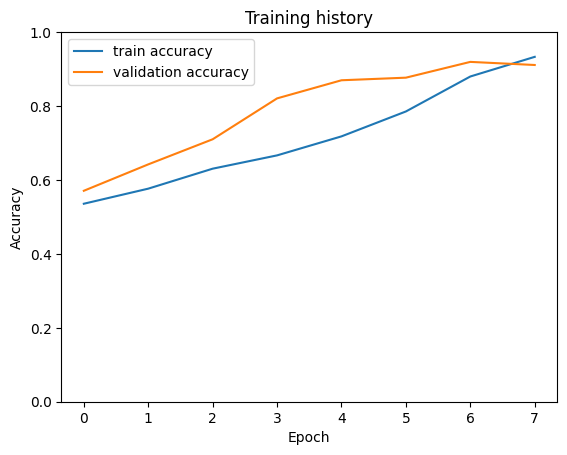

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

### Calculating dev and test precision, recall, f1-score and ROC_AUC:

In [ ]:
checkpoint = torch.load(f"/content/best_models/best_model_epoch_4.pt", weights_only=False)
model.load_state_dict(checkpoint['model_state_dict'])

In [ ]:
import torch.nn.functional as F

def get_predictions(model, data_loader):
  model = model.eval()
  tweet_ids = []
  predictions = []
  prediction_probs = []
  real_values = []
  with torch.no_grad():
    for d in data_loader:
      ids = d["id"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      outputs = F.softmax(model(
        input_ids=input_ids,
        attention_mask=attention_mask
      ))
      _, preds = torch.max(outputs, dim=1)
      tweet_ids.extend(ids)
      predictions.extend(preds)
      prediction_probs.extend(outputs)
  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  return tweet_ids, predictions, prediction_probs

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

tweet_ids, predicted_dev_labels, prediction_probs = get_predictions(model,dev_data_loader)
dev_labels = dev_df.label
dev_precision = precision_score(dev_labels, predicted_dev_labels)
dev_recall = recall_score(dev_labels, predicted_dev_labels)
dev_f_measure = f1_score(dev_labels, predicted_dev_labels)
dev_roc_auc = roc_auc_score(dev_labels, predicted_dev_labels)
print(f"Dev:\nPrecision: {dev_precision}\n"
        f"Recall: {dev_recall}\n"
        f"F-measure: {dev_f_measure}\n"
        f"ROC_AUC: {dev_roc_auc}")
print(classification_report(dev_labels, predicted_dev_labels))

<ipython-input-210-6dd398b3003a>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  outputs = F.softmax(model(


Dev:
Precision: 0.5128205128205128
Recall: 0.5309734513274337
F-measure: 0.5217391304347826
ROC_AUC: 0.7438137218614354
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1315
           1       0.51      0.53      0.52       113

    accuracy                           0.92      1428
   macro avg       0.74      0.74      0.74      1428
weighted avg       0.92      0.92      0.92      1428



In [ ]:
tweet_ids, predicted_test_labels, prediction_probs = get_predictions(model, test_data_loader)

df_submit = pd.DataFrame(columns=["id", "class"])
df_submit["id"] = test_df['id'].values
# df_submit["class"] = [float(x[1]) for x in prediction_probs]
df_submit["class"] = [x.item() for x in predicted_test_labels]
df_submit.to_csv("solution.csv", sep=",", index=False)

<ipython-input-428-6dd398b3003a>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  outputs = F.softmax(model(
